In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from pandas.core.dtypes.common import is_numeric_dtype

data = pd.read_csv("finalData.csv")
data = data.set_index('projectID')
pd.set_option('display.float_format',  '{:,.3f}'.format)
data

,success,Lamount,creator_gender,Lgoal,words,backers_count,serial_entrepreneur,duration,category_art,category_comics,...,category_photography,category_publishing,category_technology,category_theater,month,year,media,sustainability,story,url
projectID,,,,,,,,,,,,,,,,,,,,,
3731940,0,2.307,0,3.778,71,5,0,60.000,0,0,...,0,0,1,0,6,2019,0,0,app go benefit trainer personnel look get fit ...,https://www.kickstarter.com/projects/fitnesspo...
3451605,1,5.067,0,4.000,497,2003,1,14.583,0,0,...,0,0,0,0,6,2019,1,0,even miss kickstarter still get hand papillon ...,https://www.kickstarter.com/projects/kolossalg...
3722583,0,1.447,0,3.778,443,6,0,30.000,0,1,...,0,0,0,0,6,2019,1,0,journey blak blak blak officially entitle blak...,https://www.kickstarter.com/projects/myheart/b...
3745862,1,3.266,1,3.176,474,48,0,39.687,0,0,...,0,0,0,0,6,2019,1,0,isabel jazz folk musical teach empathy metoo s...,https://www.kickstarter.com/projects/annawestb...
3735376,1,3.000,1,3.000,130,17,0,25.990,0,0,...,0,0,0,1,6,2019,0,0,main stage kids head new york young performer ...,https://www.kickstarter.com/projects/mainstage...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378823,1,4.797,0,4.447,837,232,1,30.000,0,0,...,1,0,0,0,5,2022,1,0,book maui mauka makai companion book maui coas...,https://www.kickstarter.com/projects/danielsul...
4394019,1,4.045,0,4.000,167,80,0,26.377,0,0,...,0,0,0,0,5,2022,1,0,myrcene ale co dream mike goergen cy higgins m...,https://www.kickstarter.com/projects/myrceneal...
4385597,1,4.403,0,4.398,138,73,0,14.147,0,0,...,0,0,0,1,5,2022,1,0,firefly theatrical need help build theatre spa...,https://www.kickstarter.com/projects/fireflyth...


In [2]:
# Table 1
def getCategory(entry):
    for category in entry.index:
        if entry.get(category) == 1:
            return category.split("_")[1]

    return "unknown"


table1 = data.copy()
table1['Category'] = table1.apply(lambda entry: getCategory(entry[8:23]), axis=1)
table1 = table1.rename(columns={"creator_gender": "Female"})
table1 = table1.groupby(['Category', 'Female']).agg({'success': ['size', 'mean', 'std']})
table1.columns = ['Obs', 'Mean', 'SD']
table1.to_csv('Tables/category breakdown.csv')
table1

Obs  Mean    SD
Category    Female                  
art         0        376 0.809 0.394
            1        643 0.865 0.342
comics      0        791 0.934 0.248
            1        147 0.884 0.321
crafts      0         69 0.565 0.499
            1         86 0.512 0.503
dance       0          4 0.750 0.500
            1         13 0.846 0.376
design      0        439 0.945 0.228
            1        168 0.905 0.294
fashion     0        192 0.578 0.495
            1        246 0.809 0.394
film&video  0        511 0.542 0.499
            1        199 0.623 0.486
food        0        303 0.482 0.500
            1        204 0.422 0.495
games       0       1243 0.926 0.262
            1        210 0.900 0.301
journalism  0         41 0.415 0.499
            1         31 0.226 0.425
music       0        474 0.781 0.414
            1        198 0.823 0.382
photography 0         74 0.689 0.466
            1         40 0.675 0.474
publishing  0        531 0.846 0.362
            1        393 0.888 0.316
technology  0        550 0.367 0.483
            1        133 0.308 0.464
theater     0         46 0.630 0.488
            1         33 0.697 0.467

In [3]:
# Table 2
table2 = data.copy()
table2 = table2.rename(columns={"creator_gender": "Female"})
table2 = table2.groupby(['Female']).agg({'success': ['size', 'mean', 'std']})
table2.columns = ['Obs', 'Mean', 'SD']

# maleData = data[data['creator_gender'] == 0]
# maleCI = st.norm.interval(confidence=0.95,
#                           loc=np.mean(maleData['success']),
#                           scale=st.sem(maleData['success']))
# femaleData = data[data['creator_gender'] == 1]
# femaleCI = st.norm.interval(confidence=0.95,
#                             loc=np.mean(femaleData['success']),
#                             scale=st.sem(femaleData['success']))
# table2.insert(2, "95% CI (lower)", [maleCI[0], femaleCI[0]])
# table2.insert(3, "95% CI (upper)", [maleCI[1], femaleCI[1]])

table2.to_csv('Tables/gender breakdown.csv')
table2

,Obs,Mean,SD
Female,,,
0,5644,0.762,0.426
1,2744,0.766,0.424


In [4]:
# Table 3
variableNames = []
means = []
medians = []
minima = []
maxima = []
SDs = []

for variableName in data.columns:
    variableData = data[variableName]
    if is_numeric_dtype(variableData):
        if variableName[0] == "L":
            variableData = 10**variableData
            variableName = variableName.replace("L", "")
        variableNames.append(variableName)
        means.append(np.mean(variableData))
        medians.append(np.median(variableData))
        minima.append(np.min(variableData))
        maxima.append(np.max(variableData))
        SDs.append(np.std(variableData))

variableNames[variableNames.index("creator_gender")] = "female"
table3 = {"Variable": variableNames, "Mean": means, "Median": medians, "Minimum": minima, "Maximum": maxima, "SD": SDs}
table3 = pd.DataFrame.from_dict(table3)
table3 = table3.set_index("Variable")
table3

,Mean,Median,Minimum,Maximum,SD
Variable,,,,,
success,0.763,1.000,0.000,1.000,0.425
amount,"66,149.066","3,838.000",1.000,"272,707,148.204","2,984,093.960"
female,0.327,0.000,0.000,1.000,0.469
goal,"19,854.147","4,000.000",1.000,"14,000,000.000","188,831.801"
words,408.228,305.000,2.000,"2,588.000",362.641
backers_count,345.802,65.000,1.000,"55,024.000","1,595.292"
serial_entrepreneur,0.252,0.000,0.000,1.000,0.434
duration,32.190,30.000,1.000,73.958,12.615
category_art,0.121,0.000,0.000,1.000,0.327


In [5]:
# Table 4
successData = data[data['success'] == 1]
failureData = data[data['success'] == 0]

variableNames = []

meansSuccess = []
meansFailure = []
mediansSuccess = []
mediansFailure = []

testStatisticValuesMean = []
probabilityValuesMean = []

moodsMedianTestVariables = ['amount', 'goal', 'words', 'backers_count', 'duration', 'month'] # month (yes/no)?
testStatisticValuesMedian = []
probabilityValuesMedian = []

for variableName in data.columns[1:]:
    variableDataSuccess = successData[variableName]
    if is_numeric_dtype(variableDataSuccess):
        variableDataFailure = failureData[variableName]
        if variableName[0] == "L":
            variableDataSuccess = 10**variableDataSuccess
            variableDataFailure = 10**variableDataFailure
            variableName = variableName.replace("L", "")
        variableNames.append(variableName)

        # Compute means and medians
        meansSuccess.append(np.mean(variableDataSuccess))
        meansFailure.append(np.mean(variableDataFailure))
        mediansSuccess.append(np.median(variableDataSuccess))
        mediansFailure.append(np.median(variableDataFailure))

        # Check variance ratio
        successVariance = np.var(variableDataSuccess)
        failureVariance = np.var(variableDataFailure)

        biggerNumber = np.maximum(successVariance, failureVariance)
        smallerNumber = np.minimum(successVariance, failureVariance)

        equalVariance = False
        if biggerNumber / smallerNumber < 4:
            equalVariance = True

        # Perform two sample t-test
        result = st.ttest_ind(a=variableDataSuccess, b=variableDataFailure, equal_var=equalVariance)
        testStatisticValuesMean.append(result[0])
        probabilityValuesMean.append(result[1])

        # Perform Mood's median test
        if variableName in moodsMedianTestVariables:
            result = st.median_test(variableDataSuccess, variableDataFailure)
        else:
            result = ["N/A", "N/A"]
        testStatisticValuesMedian.append(result[0])
        probabilityValuesMedian.append(result[1])


def cleanPValues(pValues):
    cleanPValues_ = []
    for pValue in pValues:
        if pValue != "N/A":
            if pValue < 0.001:
                pValue = "< 0.001"
        cleanPValues_.append(pValue)
    return cleanPValues_


probabilityValuesMean = cleanPValues(probabilityValuesMean)
probabilityValuesMedian = cleanPValues(probabilityValuesMedian)

variableNames[variableNames.index('creator_gender')] = 'female'
table4 = {'Variable': variableNames, 'Success (mean)': meansSuccess, 'Failure (mean)': meansFailure, 't-Value': testStatisticValuesMean, 'p-Value': probabilityValuesMean}
table4 = pd.DataFrame.from_dict(table4)
table4 = table4.set_index('Variable')
table4.to_csv('Tables/univariate analysis (mean).csv')
table4

,Success (mean),Failure (mean),t-Value,p-Value
Variable,,,,
amount,"86,187.957","1,467.079",1.985,0.047
female,0.328,0.324,0.330,0.741
goal,"9,108.673","54,538.632",-5.420,< 0.001
words,447.126,282.672,17.985,< 0.001
backers_count,448.074,15.687,19.068,< 0.001
serial_entrepreneur,0.324,0.019,46.108,< 0.001
duration,29.700,40.227,-34.731,< 0.001
category_art,0.134,0.080,6.466,< 0.001
category_comics,0.136,0.035,12.578,< 0.001


In [6]:
# Table 4 (continued)
table4 = {'Variable': variableNames, 'Success (median)': mediansSuccess, 'Failure (median)': mediansFailure, 'χ²-Value': testStatisticValuesMedian, 'p-Value': probabilityValuesMedian}
table4 = pd.DataFrame.from_dict(table4)
table4 = table4.set_index('Variable')
table4.to_csv('Tables/univariate analysis (median).csv')
table4

,Success (median),Failure (median),χ²-Value,p-Value
Variable,,,,
amount,"6,127.500",171.000,"1,737.998",< 0.001
female,0.000,0.000,N/A,N/A
goal,"3,000.000","10,000.000",490.965,< 0.001
words,345.000,195.500,373.029,< 0.001
backers_count,104.000,5.000,"2,105.926",< 0.001
serial_entrepreneur,0.000,0.000,N/A,N/A
duration,30.000,31.039,343.548,< 0.001
category_art,0.000,0.000,N/A,N/A
category_comics,0.000,0.000,N/A,N/A


In [7]:
liwcData = pd.read_csv('LIWC-22 Results - finalData - LIWC Analysis.csv')
liwcData = liwcData.set_index('projectID')
liwcData = liwcData[data.columns.tolist() + ['money', 'emotion', 'Social', 'Drives']]
liwcData = liwcData.rename(columns={'money': 'business', 'emotion': 'empathic', 'Social': 'social', 'Drives': 'drives'})
liwcData

,success,Lamount,creator_gender,Lgoal,words,backers_count,serial_entrepreneur,duration,category_art,category_comics,...,month,year,media,sustainability,story,url,business,empathic,social,drives
projectID,,,,,,,,,,,,,,,,,,,,,
3731940,0,2.307,0,3.778,71,5,0,60.000,0,0,...,6,2019,0,0,app go benefit trainer personnel look get fit ...,https://www.kickstarter.com/projects/fitnesspo...,1.408,0.000,8.451,7.042
3451605,1,5.067,0,4.000,497,2003,1,14.583,0,0,...,6,2019,1,0,even miss kickstarter still get hand papillon ...,https://www.kickstarter.com/projects/kolossalg...,3.414,2.610,9.839,11.245
3722583,0,1.447,0,3.778,443,6,0,30.000,0,1,...,6,2019,1,0,journey blak blak blak officially entitle blak...,https://www.kickstarter.com/projects/myheart/b...,0.903,0.677,13.318,10.384
3745862,1,3.266,1,3.176,474,48,0,39.687,0,0,...,6,2019,1,0,isabel jazz folk musical teach empathy metoo s...,https://www.kickstarter.com/projects/annawestb...,1.477,1.899,17.511,11.181
3735376,1,3.000,1,3.000,130,17,0,25.990,0,0,...,6,2019,0,0,main stage kids head new york young performer ...,https://www.kickstarter.com/projects/mainstage...,0.000,0.769,16.154,6.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378823,1,4.797,0,4.447,837,232,1,30.000,0,0,...,5,2022,1,0,book maui mauka makai companion book maui coas...,https://www.kickstarter.com/projects/danielsul...,0.239,1.912,6.810,6.093
4394019,1,4.045,0,4.000,167,80,0,26.377,0,0,...,5,2022,1,0,myrcene ale co dream mike goergen cy higgins m...,https://www.kickstarter.com/projects/myrceneal...,1.198,3.593,9.581,7.186
4385597,1,4.403,0,4.398,138,73,0,14.147,0,0,...,5,2022,1,0,firefly theatrical need help build theatre spa...,https://www.kickstarter.com/projects/fireflyth...,2.899,0.725,7.971,5.797


In [8]:
# Table 5
table5 = {
    'money': ['cash', 'fines', 'invest', 'irs', 'market', 'profit', 'rich', 'spend', 'usd', 'worth'],
    'emotion': ['admire', 'clinical depression', 'envies', 'furious', 'heartbreaking', 'misery', 'not a good idea', 'rage', 'tantrum', 'you\'d love'],
    'social': ['admittedly', 'consoling', 'ex-wife', 'ladies man', 'mob', 'papa', 'stalking', 'transgender', 'village', 'white guy'],
    'drives': ['abuser', 'chat', 'dear', 'denies', 'excelling', 'law', 'mamacita', 'perfection', 'sergeant', 'sultan']
}
table5 = pd.DataFrame.from_dict(table5)
table5.to_csv('Tables/category examples.csv', index=False)
table5

,money,emotion,social,drives
0,cash,admire,admittedly,abuser
1,fines,clinical depression,consoling,chat
2,invest,envies,ex-wife,dear
3,irs,furious,ladies man,denies
4,market,heartbreaking,mob,excelling
5,profit,misery,papa,law
6,rich,not a good idea,stalking,mamacita
7,spend,rage,transgender,perfection
8,usd,tantrum,village,sergeant
9,worth,you'd love,white guy,sultan


In [9]:
# Table 3 (continued)
for variableName in ['business', 'empathic', 'social', 'drives']:
    variableData = liwcData[variableName]
    table3 = pd.concat([table3, pd.DataFrame({'Mean': np.mean(variableData), 'Median': np.median(variableData), 'Minimum': np.min(variableData), 'Maximum': np.max(variableData), 'SD': np.std(variableData)}, index=[variableName])])

table3.index.name = 'Variable'
table3.to_csv('Tables/descriptive statistics.csv')
table3

,Mean,Median,Minimum,Maximum,SD
Variable,,,,,
success,0.763,1.000,0.000,1.000,0.425
amount,"66,149.066","3,838.000",1.000,"272,707,148.204","2,984,093.960"
female,0.327,0.000,0.000,1.000,0.469
goal,"19,854.147","4,000.000",1.000,"14,000,000.000","188,831.801"
words,408.228,305.000,2.000,"2,588.000",362.641
backers_count,345.802,65.000,1.000,"55,024.000","1,595.292"
serial_entrepreneur,0.252,0.000,0.000,1.000,0.434
duration,32.190,30.000,1.000,73.958,12.615
category_art,0.121,0.000,0.000,1.000,0.327


In [10]:
# Table 7
table7 = liwcData.corr()
table7.to_csv('Tables/correlation matrix.csv')
table7

,success,Lamount,creator_gender,Lgoal,words,backers_count,serial_entrepreneur,duration,category_art,category_comics,...,category_technology,category_theater,month,year,media,sustainability,business,empathic,social,drives
success,1.000,0.653,0.004,-0.322,0.193,0.115,0.298,-0.355,0.070,0.136,...,-0.286,-0.024,-0.034,0.065,0.462,-0.020,-0.139,-0.042,-0.146,-0.074
Lamount,0.653,1.000,-0.051,0.187,0.377,0.335,0.263,-0.218,-0.055,0.058,...,-0.141,-0.028,-0.003,0.068,0.465,0.075,-0.155,-0.092,-0.158,-0.061
creator_gender,0.004,-0.051,1.000,-0.091,-0.081,-0.070,-0.085,-0.009,0.241,-0.129,...,-0.084,0.019,0.006,0.015,-0.030,0.051,0.104,0.117,0.115,0.038
Lgoal,-0.322,0.187,-0.091,1.000,0.189,0.179,-0.158,0.291,-0.251,-0.103,...,0.239,0.014,0.072,-0.010,-0.073,0.103,0.026,-0.053,0.099,0.071
words,0.193,0.377,-0.081,0.189,1.000,0.145,0.141,-0.101,-0.085,0.045,...,-0.002,-0.027,0.004,0.031,0.262,0.126,-0.097,-0.133,-0.089,-0.039
backers_count,0.115,0.335,-0.070,0.179,0.145,1.000,0.133,-0.044,-0.051,-0.021,...,-0.007,-0.018,-0.010,-0.021,0.079,0.017,-0.020,-0.064,-0.067,0.006
serial_entrepreneur,0.298,0.263,-0.085,-0.158,0.141,0.133,1.000,-0.301,0.055,0.184,...,-0.130,-0.034,-0.053,0.083,0.200,-0.053,-0.063,-0.093,-0.178,-0.080
duration,-0.355,-0.218,-0.009,0.291,-0.101,-0.044,-0.301,1.000,-0.093,-0.066,...,0.157,0.021,0.040,-0.026,-0.256,0.050,0.035,0.041,0.125,0.058
category_art,0.070,-0.055,0.241,-0.251,-0.085,-0.051,0.055,-0.093,1.000,-0.132,...,-0.111,-0.036,-0.006,-0.002,0.067,-0.033,0.095,0.029,-0.073,0.005
category_comics,0.136,0.058,-0.129,-0.103,0.045,-0.021,0.184,-0.066,-0.132,1.000,...,-0.106,-0.035,-0.005,0.062,0.114,-0.064,-0.138,-0.026,0.004,-0.063


In [26]:
maleData = liwcData[liwcData['creator_gender'] == 0]
femaleData = liwcData[liwcData['creator_gender'] == 1]

languages = liwcData.columns.tolist()[29:]
maleMeans = []
femaleMeans = []
tValues = []
pValues = []
for language in languages:
    maleLanguageData = maleData[language]
    femaleLanguageData = femaleData[language]

    # Calculate the means
    maleMeans.append(np.mean(maleLanguageData))
    femaleMeans.append(np.mean(femaleLanguageData))

    # Check for equal variance
    maleVariance = np.var(maleLanguageData)
    femaleVariance = np.var(femaleLanguageData)

    biggerNumber = np.maximum(maleVariance, femaleVariance)
    smallerNumber = np.minimum(maleVariance, femaleVariance)

    equalVariance = False
    if biggerNumber / smallerNumber < 4:
        equalVariance = True

    # Perform two-sample t-test
    result = st.ttest_ind(a=maleLanguageData, b=femaleLanguageData, equal_var=equalVariance)
    tValues.append(result[0])
    if result[1] > 0.001:
        pValues.append(result[1])
    else:
        pValues.append("< 0.001")

table8 = {"Language": languages, "Male (mean)": maleMeans, "Female (mean)": femaleMeans, "t-Value": tValues, "p-Value": pValues}
table8 = pd.DataFrame.from_dict(table8)
table8 = table8.set_index('Language')
table8.to_csv('Tables/t-tests languages.csv')
table8

,Male (mean),Female (mean),t-Value,p-Value
Language,,,,
business,1.977,2.443,-9.555,< 0.001
empathic,2.143,2.619,-10.774,< 0.001
social,10.759,11.959,-10.638,< 0.001
drives,8.026,8.303,-3.472,< 0.001


In [11]:
import statsmodels.api as sm

independentVariables = liwcData.columns.tolist()
variablesToRemove = ['success', 'Lamount', 'story', 'url', 'business', 'empathic', 'social', 'drives']
for variable in variablesToRemove:
    if variable in independentVariables:
        independentVariables.remove(variable)

X = sm.add_constant(liwcData[independentVariables])
y = liwcData['Lamount']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lamount   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     281.0
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:49:49   Log-Likelihood:                -10616.
No. Observations:                8388   AIC:                         2.128e+04
Df Residuals:                    8363   BIC:                         2.146e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -101.3445     21.031     -4.819      0.000    -142.571     -60.118
creator_gender           0.0828      0.021      3.853      0.000       0.041       0.125
Lgoal                    0.3255      0.015     21.808      0.000       0.296       0.355
words                    0.0005   2.86e-05     18.949      0.000       0.000       0.001
backers_count            0.0001    6.2e-06     24.037      0.000       0.000       0.000
serial_entrepreneur      0.3122      0.024     13.000      0.000       0.265       0.359
duration                -0.0093      0.001    -11.043      0.000      -0.011      -0.008
category_art            -6.7436      1.403     -4.807      0.000      -9.493      -3.994
category_comics         -6.6286      1.405     -4.719      0.000      -9.382      -3.875
category_crafts         -7.1762      1.405     -5.109      0.000      -9.930      -4.423
category_dance          -6.7842      1.415     -4.795      0.000      -9.557      -4.011
category_design         -6.2164      1.402     -4.433      0.000      -8.965      -3.467
category_fashion        -6.9286      1.401     -4.944      0.000      -9.675      -4.182
category_film&video     -6.7927      1.404     -4.838      0.000      -9.545      -4.040
category_food           -6.7650      1.403     -4.822      0.000      -9.515      -4.015
category_games          -6.4991      1.402     -4.634      0.000      -9.248      -3.750
category_journalism     -7.0996      1.402     -5.064      0.000      -9.848      -4.351
category_music          -6.5168      1.403     -4.646      0.000      -9.266      -3.767
category_photography    -6.8468      1.405     -4.874      0.000      -9.600      -4.093
category_publishing     -6.5886      1.404     -4.692      0.000      -9.341      -3.836
category_technology     -7.1354      1.401     -5.092      0.000      -9.882      -4.388
category_theater        -6.6228      1.405     -4.714      0.000      -9.377      -3.869
month                    0.0047      0.003      1.555      0.120      -0.001       0.011
year                     0.0540      0.011      4.867      0.000       0.032       0.076
media                    1.1504      0.031     36.886      0.000       1.089       1.212
sustainability           0.1722      0.050      3.427      0.001       0.074       0.271
==============================================================================
Omnibus:                     2031.487   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6156.060
Skew:                          -1.246   Prob(JB):                         0.00
Kurtosis:                       6.377   Cond. No.                     2.33e+15
==============================================================================

Notes:
[1] Standard Errors 

In [12]:
correlations = table7['Lamount']
correlations = correlations[abs(correlations) > 0.15]
correlations

success                0.653
Lamount                1.000
Lgoal                  0.187
words                  0.377
backers_count          0.335
serial_entrepreneur    0.263
duration              -0.218
category_design        0.175
category_games         0.206
media                  0.465
business              -0.155
social                -0.158
Name: Lamount, dtype: float64

C:\Users\Perso\Documents\GitHub\KickstarterScraper\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Lamount', ylabel='category_design'>

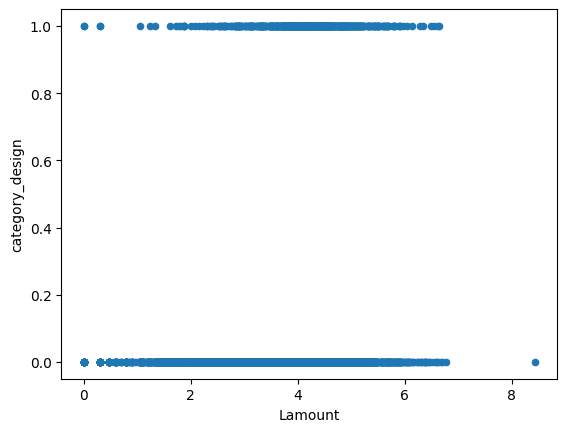

In [13]:
liwcData.plot.scatter(x = 'Lamount', y = 'category_design')